In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.drop('id', axis = 1, inplace = True)
df.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [5]:
df.columns  = ['age','blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
               'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume',
               'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
               'pedal_edema', 'anemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

**DATATYPE CONVERSION**

In [7]:
df[['specific_gravity','albumin','sugar']] = df[['specific_gravity','albumin','sugar']].astype(object)

In [8]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [9]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
num_cols = df.select_dtypes(include = 'number').columns.tolist()

print("Categorical Columns: ", cat_cols)
print("\nNumerical Columns: ", num_cols)

Categorical Columns:  ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']

Numerical Columns:  ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


**Unique values in each column of a dataset**

In [10]:
for col in cat_cols:
  print(col, ":\n", df[col].unique())
  print()

specific_gravity :
 [1.02 1.01 1.005 1.015 nan 1.025]

albumin :
 [1.0 4.0 2.0 3.0 0.0 nan 5.0]

sugar :
 [0.0 3.0 4.0 1.0 nan 2.0 5.0]

red_blood_cells :
 [nan 'normal' 'abnormal']

pus_cell :
 ['normal' 'abnormal' nan]

pus_cell_clumps :
 ['notpresent' 'present' nan]

bacteria :
 ['notpresent' 'present' nan]

hypertension :
 ['yes' 'no' nan]

diabetes_mellitus :
 ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary_artery_disease :
 ['no' 'yes' '\tno' nan]

appetite :
 ['good' 'poor' nan]

pedal_edema :
 ['no' 'yes' nan]

anemia :
 ['no' 'yes' nan]

class :
 ['ckd' 'ckd\t' 'notckd']



**Mistake Correction**

In [11]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({' yes' : 'yes', '\tno':'no', '\tyes':'no'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno':'no'})

In [12]:
df['class'] = df['class'].replace({'ckd\t':'ckd'})

**Encoding Target CLass**

In [13]:
df['class'] = df['class'].replace({'ckd':0, 'notckd':1})
df[['class']] = df[['class']].astype(object)

**AUTO EDA**

In [14]:
pip install dataprep

Computing series-sum-chunk-25c92753ac42f1925078079842d95d3b-cdcee932a7bc2563751c17ebf2faeb6c:  30%|██▉       | 1034/3456 [00:01<00:02, 819.04it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.ap


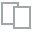
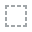
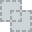
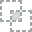
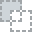
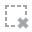
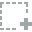
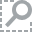
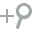
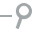
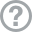
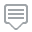
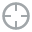
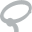
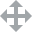
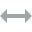
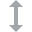
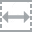
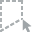
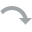
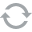
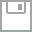
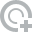
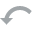
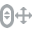
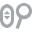
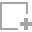
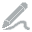
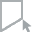
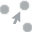
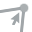
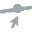

In [15]:
import dataprep.eda as eda

report = eda.create_report(df)
report.show()

**Exploratory Data Analysis**

<Figure size 2000x1000 with 0 Axes>

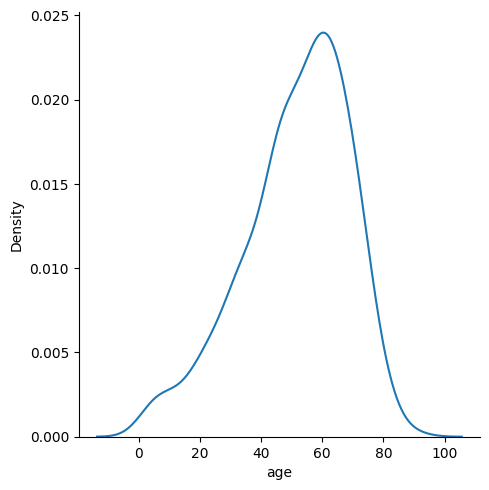

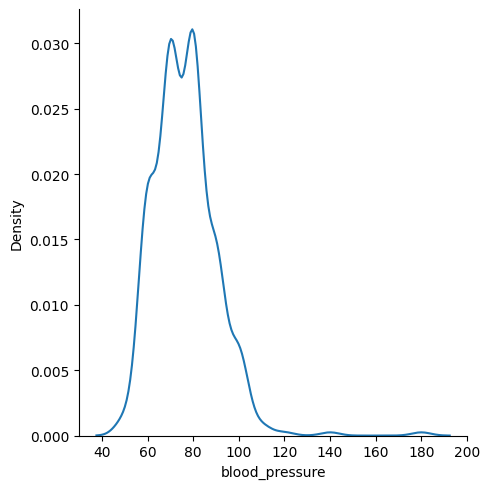

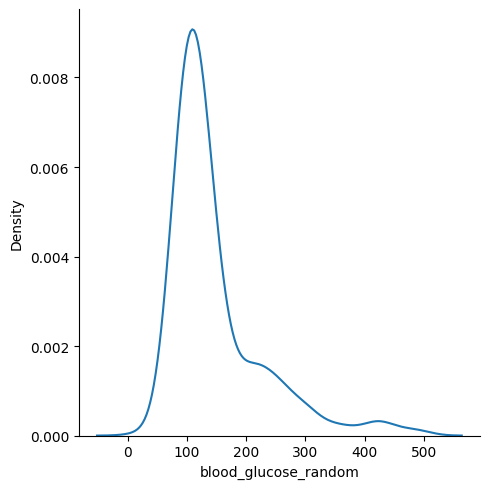

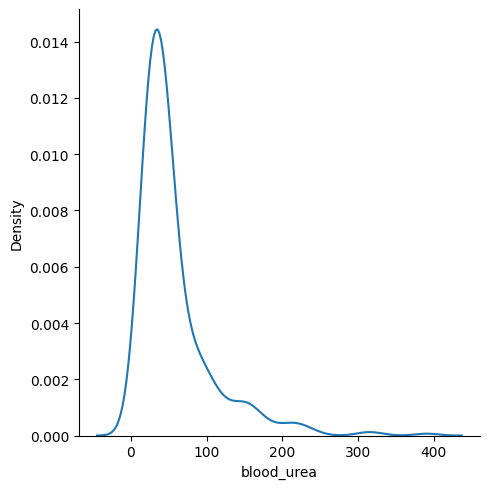

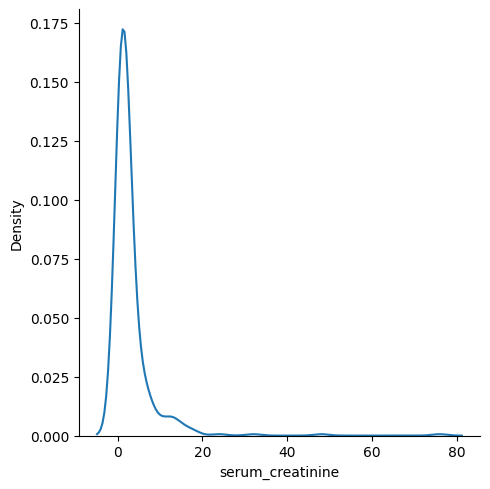

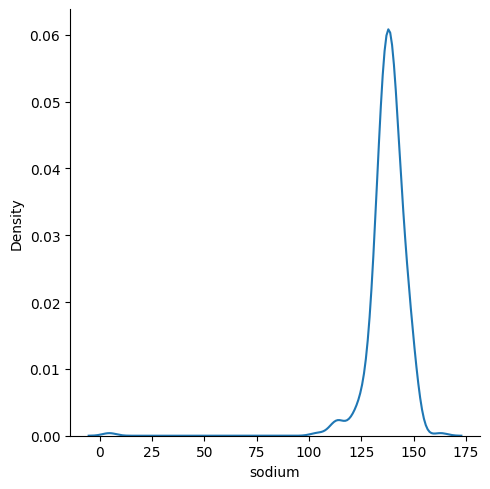

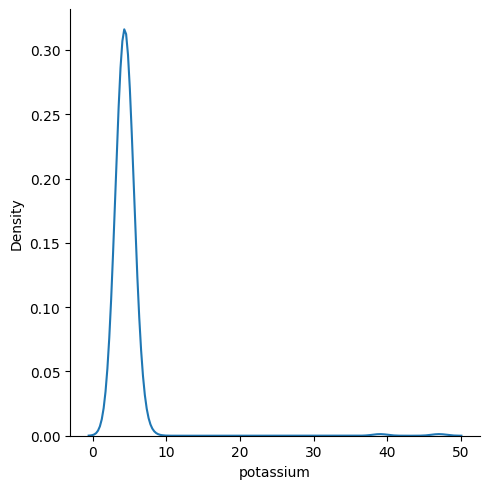

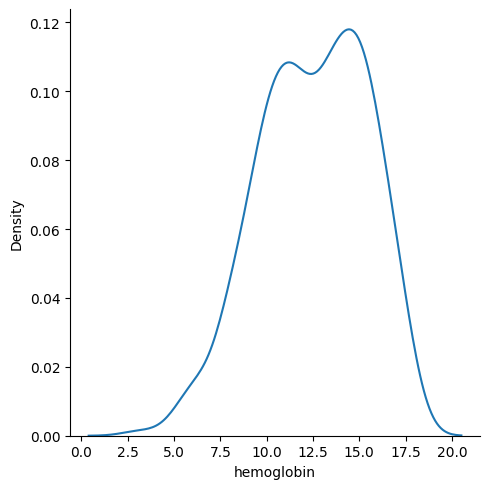

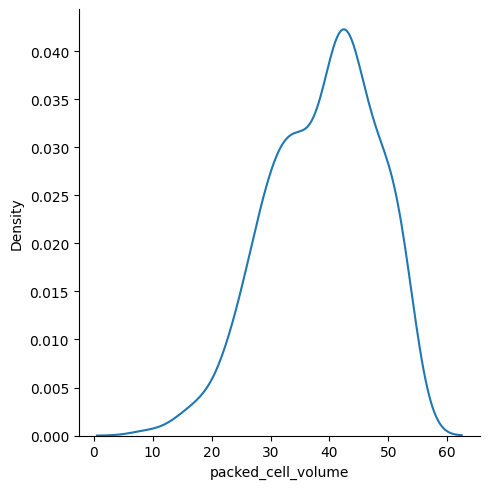

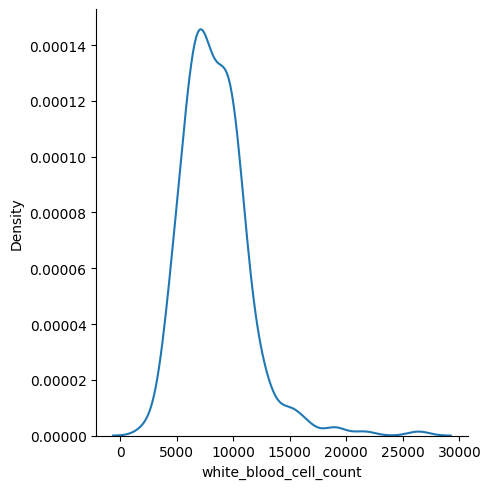

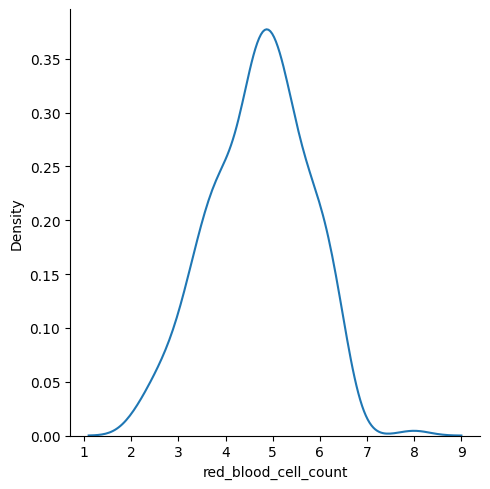

In [16]:
plt.figure(figsize=(20,10))
for col in num_cols:
  sns.displot(df[col], kind='kde')
  plt.show()

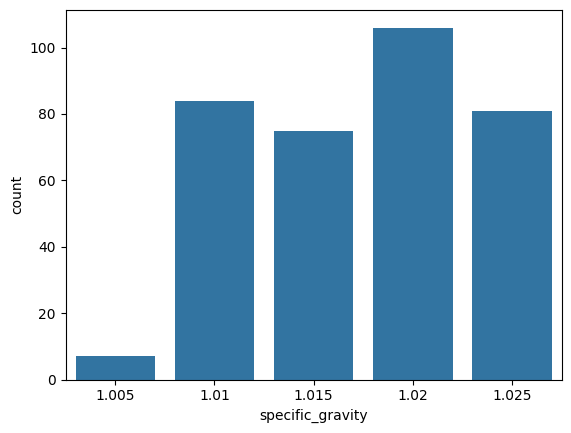

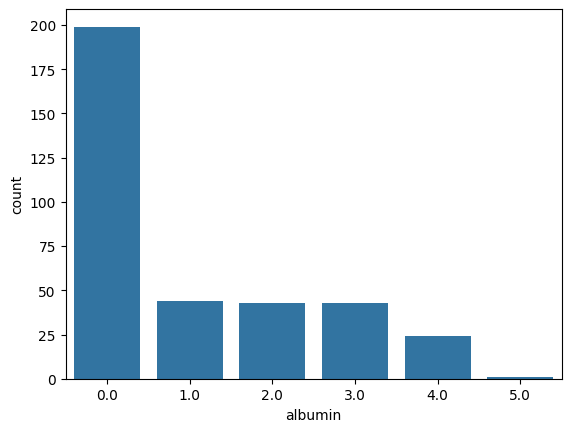

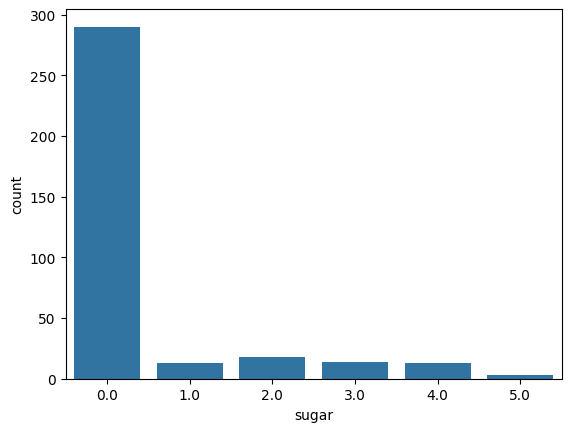

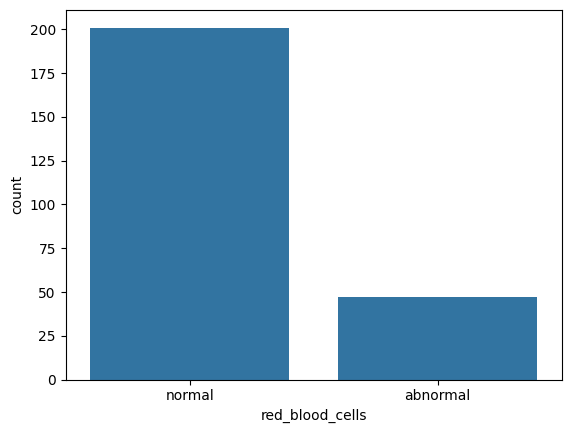

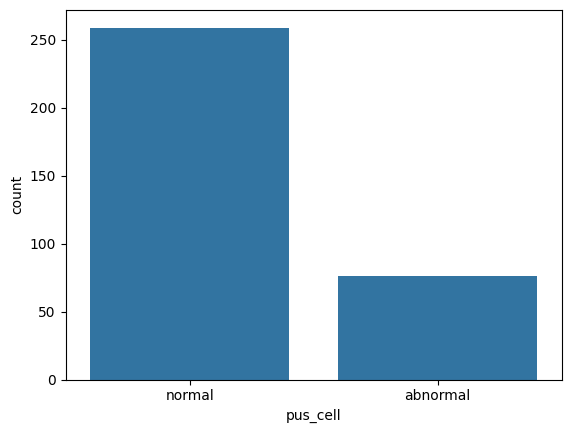

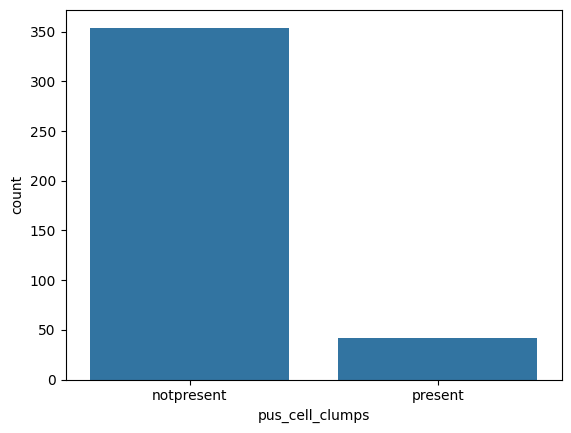

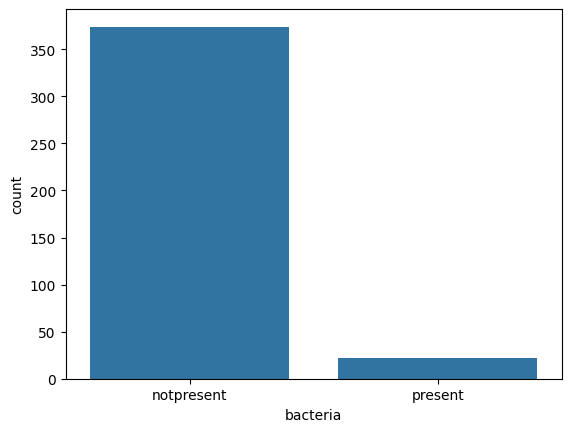

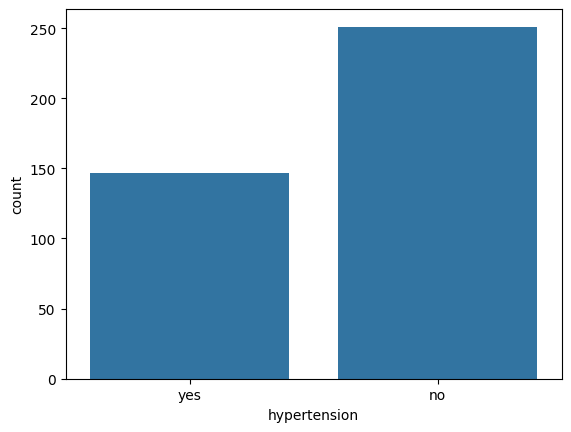

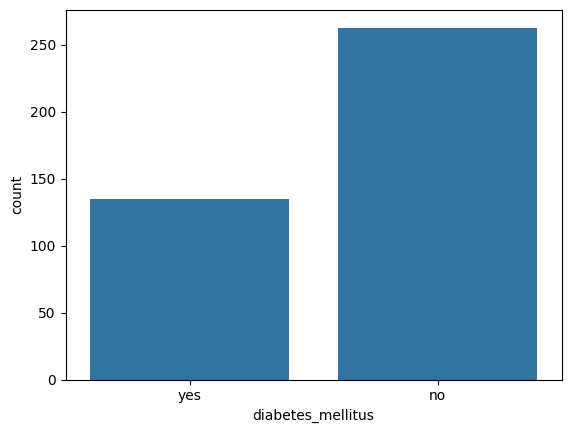

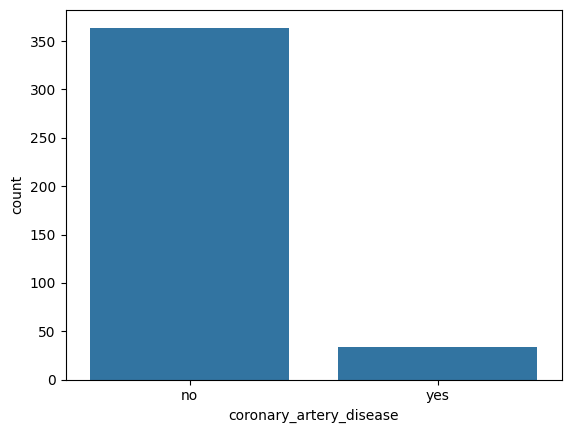

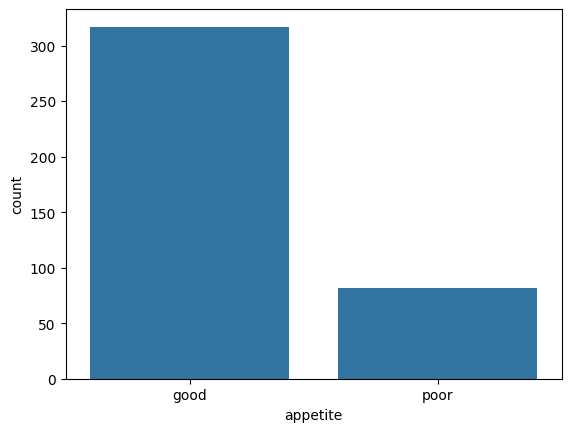

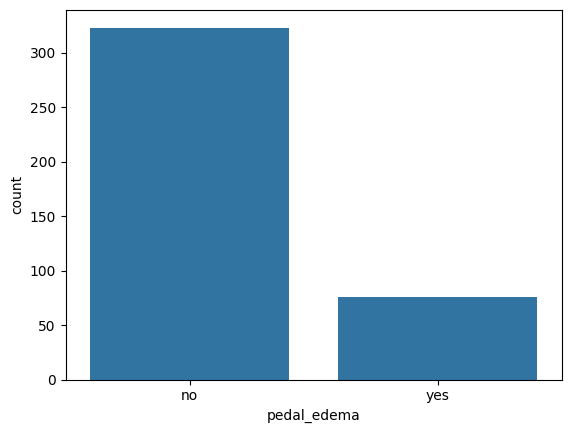

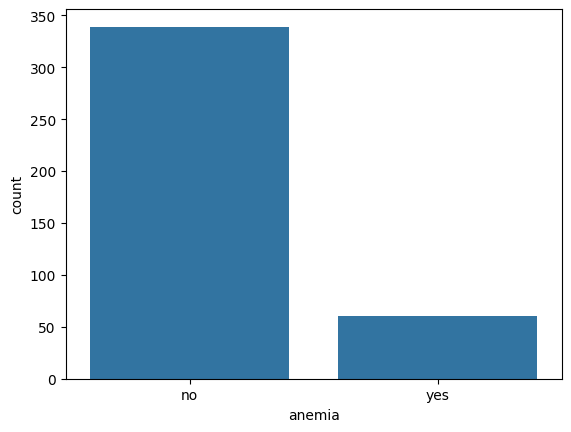

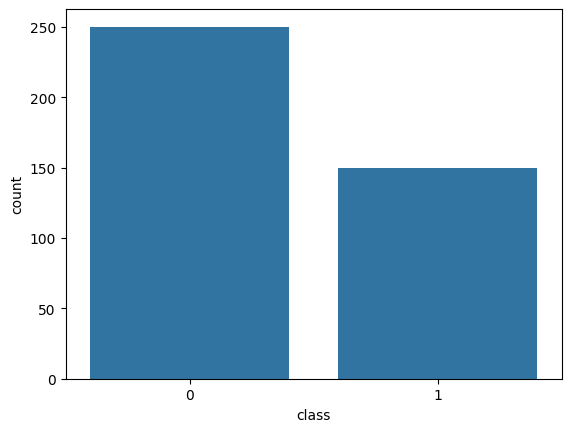

In [17]:
for col in cat_cols:
  sns.countplot(data = df, x = col)
  plt.xlabel(col)
  plt.show()

<ipython-input-18-ed7756bfdec1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


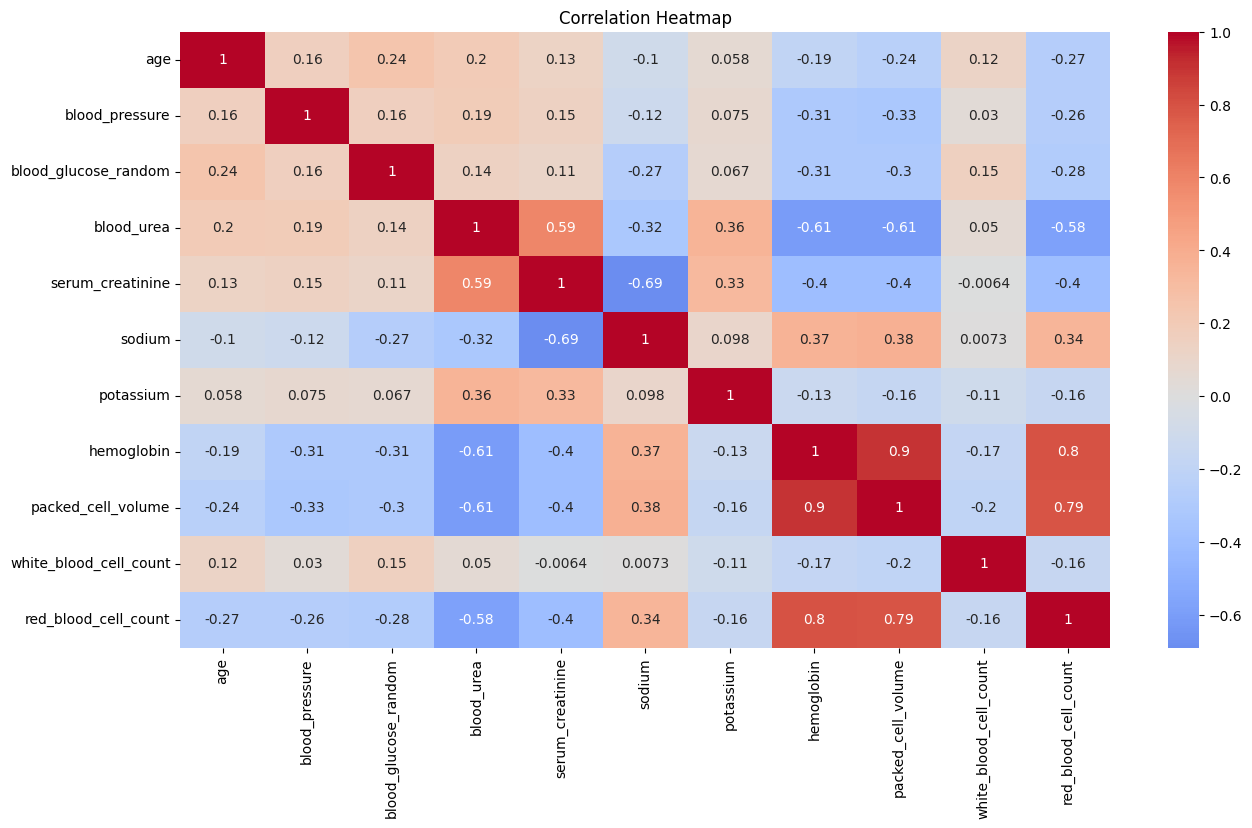

In [18]:
corr = df.corr()

plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

**Check for Null Values**

In [19]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [20]:
df[cat_cols].isnull().sum()

specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [21]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

**Fill the missing values**

In [22]:
def random_sampling(df,col):
  non_null_values = df[col].dropna().values
  r_samples = np.random.choice(non_null_values, size=df[col].isnull().sum(), replace=True)
  df.loc[df[col].isnull(), col] = r_samples
  return df

In [23]:
def fill_using_mode(df, col):
  mode = df[col].mode()[0]
  df[col] = df[col].fillna(mode)
  return df

In [24]:
for col in num_cols:
  df = random_sampling(df, col)

In [25]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [26]:
df = random_sampling(df, 'red_blood_cells')
df = random_sampling(df, 'pus_cell')

In [27]:
for col in cat_cols:
  if col != 'red_blood_cells' and col != 'pus_cell':
    df = fill_using_mode(df, col)

In [28]:
df[cat_cols].isnull().sum()

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [29]:
for col in cat_cols:
  print(col, ":\n", df[col].unique())
  print()

specific_gravity :
 [1.02  1.01  1.005 1.015 1.025]

albumin :
 [1. 4. 2. 3. 0. 5.]

sugar :
 [0. 3. 4. 1. 2. 5.]

red_blood_cells :
 ['normal' 'abnormal']

pus_cell :
 ['normal' 'abnormal']

pus_cell_clumps :
 ['notpresent' 'present']

bacteria :
 ['notpresent' 'present']

hypertension :
 ['yes' 'no']

diabetes_mellitus :
 ['yes' 'no']

coronary_artery_disease :
 ['no' 'yes']

appetite :
 ['good' 'poor']

pedal_edema :
 ['no' 'yes']

anemia :
 ['no' 'yes']

class :
 [0 1]



**Encoding**

In [30]:
le = LabelEncoder()
for col in cat_cols[3:]:
  df[col] = le.fit_transform(df[col])

In [31]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                  98.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal_edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

**Splitting data into Training data and Testing data**

In [145]:
x = df.drop('class', axis = 1)
y = df['class']

In [146]:
x.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  hemoglobin  \
0         1                0         0                 121.0  ...        15.4   
1         1                0         0                  98.0  ...        11.3   
2         1                0         0                 423.0  ...         9.6   
3         0                1         0                 117.0  ...        11.2   
4         1                0         0                 106.0  ...        11.6   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal_edema  anemia  
0            0       0  
1            0       0  
2            0       1  
3            1       1  
4            0       0  

[5 rows x 24 columns]

In [147]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

**Model Building**

**(i) KNN CLASSIFIER**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_knn_test_pred = knn.predict(x_test)
knn_test_acc = accuracy_score(y_test, y_knn_test_pred)

y_knn_train_pred = knn.predict(x_train)
knn_train_acc = accuracy_score(y_train, y_knn_train_pred)

print("KNN Training Accuracy: ", knn_train_acc)
print("KNN Testing Accuracy: ", knn_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_knn_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

knn_report = classification_report(y_test, y_knn_test_pred)
print("Classification Report:\n", knn_report)

KNN Training Accuracy:  0.7857142857142857
KNN Testing Accuracy:  0.7

Confusion Matrix: 
 [[55 17]
 [19 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        72
           1       0.63      0.60      0.62        48

    accuracy                           0.70       120
   macro avg       0.69      0.68      0.69       120
weighted avg       0.70      0.70      0.70       120



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_knn_test_pred = knn.predict(x_test)
scale_knn_test_acc = accuracy_score(y_test, y_knn_test_pred)

y_knn_train_pred = knn.predict(x_train)
scale_knn_train_acc = accuracy_score(y_train, y_knn_train_pred)

print("KNN Training Accuracy: ", scale_knn_train_acc)
print("KNN Testing Accuracy: ", scale_knn_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_knn_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_knn_report = classification_report(y_test, y_knn_test_pred)
print("Classification Report:\n", scale_knn_report)

KNN Training Accuracy:  0.9642857142857143
KNN Testing Accuracy:  0.95

Confusion Matrix: 
 [[67  5]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.90      0.98      0.94        48

    accuracy                           0.95       120
   macro avg       0.94      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



**(ii) Decision Tree Classifier**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_dtc_test_pred = dtc.predict(x_test)
dtc_test_acc = accuracy_score(y_test, y_dtc_test_pred)

y_dtc_train_pred = dtc.predict(x_train)
dtc_train_acc = accuracy_score(y_train, y_dtc_train_pred)

print("Decsion Tree Classifier Training Accuracy: ", dtc_train_acc)
print("Decsion Tree Classifier Testing Accuracy: ", dtc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_dtc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

dtc_report = classification_report(y_test, y_dtc_test_pred)
print("Classification Report:\n", dtc_report)

Decsion Tree Classifier Training Accuracy:  1.0
Decsion Tree Classifier Testing Accuracy:  0.9583333333333334

Confusion Matrix: 
 [[70  2]
 [ 3 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



**Hyper Parameter Tuning For DTC**

In [61]:
from sklearn.model_selection import GridSearchCV

grid_param = {
                'criterion' : ['gini', 'entropy'],
                'max_depth' : [3,5,7,10],
                'splitter' : ['best', 'random'],
                'min_samples_split' : [1,2,3,5,7],
                'min_samples_leaf' : [1,2,3,5,7],
                'max_features' : ['auto', 'sqrt', 'log2']
            }

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [62]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.9857142857142858


In [63]:
dtc = grid_search_dtc.best_estimator_

dtc.fit(x_train, y_train)

y_dtc_test_pred = dtc.predict(x_test)
dtc_test_acc = accuracy_score(y_test, y_dtc_test_pred)

y_dtc_train_pred = dtc.predict(x_train)
dtc_train_acc = accuracy_score(y_train, y_dtc_train_pred)

print("Decsion Tree Classifier Training Accuracy: ", dtc_train_acc)
print("Decsion Tree Classifier Testing Accuracy: ", dtc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_dtc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

dtc_report = classification_report(y_test, y_dtc_test_pred)
print("Classification Report:\n", dtc_report)

Decsion Tree Classifier Training Accuracy:  0.9821428571428571
Decsion Tree Classifier Testing Accuracy:  0.975

Confusion Matrix: 
 [[70  2]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.96      0.98      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [83]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

dtc = grid_search_dtc.best_estimator_

dtc.fit(x_train, y_train)

y_dtc_test_pred = dtc.predict(x_test)
scale_dtc_test_acc = accuracy_score(y_test, y_dtc_test_pred)

y_dtc_train_pred = dtc.predict(x_train)
scale_dtc_train_acc = accuracy_score(y_train, y_dtc_train_pred)

print("Decsion Tree Classifier Training Accuracy: ", scale_dtc_train_acc)
print("Decsion Tree Classifier Testing Accuracy: ", scale_dtc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_dtc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_dtc_report = classification_report(y_test, y_dtc_test_pred)
print("Classification Report:\n", scale_dtc_report)

Decsion Tree Classifier Training Accuracy:  0.9857142857142858
Decsion Tree Classifier Testing Accuracy:  0.9833333333333333

Confusion Matrix: 
 [[72  0]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**(iii) Random Forest Classifier**

In [151]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3,
                             n_estimators=130)

rfc.fit(x_train, y_train)

y_rfc_test_pred = rfc.predict(x_test)
rfc_test_acc = accuracy_score(y_test, y_rfc_test_pred)

y_rfc_train_pred = rfc.predict(x_train)
rfc_train_acc = accuracy_score(y_train, y_rfc_train_pred)

print("Random Forest Classifier Training Accuracy: ", rfc_train_acc)
print("Random Forest Classifier Testing Accuracy: ", rfc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_rfc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

rfc_report = classification_report(y_test, y_rfc_test_pred)
print("Classification Report:\n", rfc_report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Training Accuracy:  1.0
Random Forest Classifier Testing Accuracy:  0.9833333333333333

Confusion Matrix: 
 [[72  0]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [153]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3,
                             n_estimators=130)

rfc.fit(x_train, y_train)

y_rfc_test_pred = rfc.predict(x_test)
scale_rfc_test_acc = accuracy_score(y_test, y_rfc_test_pred)

y_rfc_train_pred = rfc.predict(x_train)
scale_rfc_train_acc = accuracy_score(y_train, y_rfc_train_pred)

print("Random Forest Classifier Training Accuracy: ", scale_rfc_train_acc)
print("Random Forest Classifier Testing Accuracy: ", scale_rfc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_rfc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_rfc_report = classification_report(y_test, y_rfc_test_pred)
print("Classification Report:\n", scale_rfc_report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Training Accuracy:  0.9928571428571429
Random Forest Classifier Testing Accuracy:  1.0

Confusion Matrix: 
 [[72  0]
 [ 0 48]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**(iv) AdaBoost Classifier**

In [99]:
from sklearn.ensemble import AdaBoostClassifier

dtc = grid_search_dtc.best_estimator_

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train,y_train)

y_ada_test_pred = ada.predict(x_test)
ada_test_acc = accuracy_score(y_test, y_ada_test_pred)

y_ada_train_pred = ada.predict(x_train)
ada_train_acc = accuracy_score(y_train, y_ada_train_pred)

print("AdaBoost Classifier Training Accuracy: ", ada_train_acc)
print("AdaBoost Classifier Testing Accuracy: ", ada_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_ada_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

ada_report = classification_report(y_test, y_ada_test_pred)
print("Classification Report:\n", ada_report)

AdaBoost Classifier Training Accuracy:  1.0
AdaBoost Classifier Testing Accuracy:  0.9916666666666667

Confusion Matrix: 
 [[72  0]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [104]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

dtc = grid_search_dtc.best_estimator_

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train,y_train)

y_ada_test_pred = ada.predict(x_test)
scale_ada_test_acc = accuracy_score(y_test, y_ada_test_pred)

y_ada_train_pred = ada.predict(x_train)
scale_ada_train_acc = accuracy_score(y_train, y_ada_train_pred)

print("AdaBoost Classifier Training Accuracy: ", scale_ada_train_acc)
print("AdaBoost Classifier Testing Accuracy: ", scale_ada_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_ada_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_ada_report = classification_report(y_test, y_ada_test_pred)
print("Classification Report:\n", scale_ada_report)

AdaBoost Classifier Training Accuracy:  1.0
AdaBoost Classifier Testing Accuracy:  0.9916666666666667

Confusion Matrix: 
 [[72  0]
 [ 1 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**(v) GradientBoost Classifier**

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_gbc_test_pred = gbc.predict(x_test)
gbc_test_acc = accuracy_score(y_test, y_gbc_test_pred)

y_gbc_train_pred = gbc.predict(x_train)
gbc_train_acc = accuracy_score(y_train, y_gbc_train_pred)

print("GradientBoost Classifier Training Accuracy: ", gbc_train_acc)
print("GradientBoost Classifier Testing Accuracy: ", gbc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_gbc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

gbc_report = classification_report(y_test, y_gbc_test_pred)
print("Classification Report:\n", gbc_report)

GradientBoost Classifier Training Accuracy:  1.0
GradientBoost Classifier Testing Accuracy:  0.9833333333333333

Confusion Matrix: 
 [[72  0]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [110]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_gbc_test_pred = gbc.predict(x_test)
scale_gbc_test_acc = accuracy_score(y_test, y_gbc_test_pred)

y_gbc_train_pred = gbc.predict(x_train)
scale_gbc_train_acc = accuracy_score(y_train, y_gbc_train_pred)

print("GradientBoost Classifier Training Accuracy with scaled data: ", scale_gbc_train_acc)
print("GradientBoost Classifier Testing Accuracy with scaled data: ", scale_gbc_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_gbc_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_gbc_report = classification_report(y_test, y_gbc_test_pred)
print("Classification Report:\n", scale_gbc_report)

GradientBoost Classifier Training Accuracy with scaled data:  1.0
GradientBoost Classifier Testing Accuracy with scaled data:  0.9833333333333333

Confusion Matrix: 
 [[72  0]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**(vi) XGB Classifier**

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(x_train, y_train)

y_xgb_test_pred = xgb.predict(x_test)
xgb_test_acc = accuracy_score(y_test, y_xgb_test_pred)

y_xgb_train_pred = xgb.predict(x_train)
xgb_train_acc = accuracy_score(y_train, y_xgb_train_pred)

print("XGBoost Classifier Training Accuracy: ", xgb_train_acc)
print("XGBoost Classifier Testing Accuracy: ", xgb_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_xgb_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

xgb_report = classification_report(y_test, y_gbc_test_pred)
print("Classification Report:\n", xgb_report)

XGBoost Classifier Training Accuracy:  1.0
XGBoost Classifier Testing Accuracy:  0.975

Confusion Matrix: 
 [[71  1]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [124]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(x_train, y_train)

y_xgb_test_pred = xgb.predict(x_test)
scale_xgb_test_acc = accuracy_score(y_test, y_xgb_test_pred)

y_xgb_train_pred = xgb.predict(x_train)
scale_xgb_train_acc = accuracy_score(y_train, y_xgb_train_pred)

print("XGBoost Classifier Training Accuracy with scaled data: ", scale_xgb_train_acc)
print("XGBoost Classifier Testing Accuracy with scaled data: ", scale_xgb_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_xgb_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

scale_xgb_report = classification_report(y_test, y_gbc_test_pred)
print("Classification Report:\n", scale_xgb_report)

XGBoost Classifier Training Accuracy with scaled data:  1.0
XGBoost Classifier Testing Accuracy with scaled data:  0.975

Confusion Matrix: 
 [[71  1]
 [ 2 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**(vii) CatBoost Classifier**

In [125]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [130]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)

y_cat_test_pred = cat.predict(x_test)
cat_test_acc = accuracy_score(y_test, y_cat_test_pred)

y_cat_train_pred = cat.predict(x_train)
cat_train_acc = accuracy_score(y_train, y_cat_train_pred)

print("CatBoost Classifier Training Accuracy: ", cat_train_acc)
print("CatBoost Classifier Testing Accuracy: ", cat_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_cat_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

cat_report = classification_report(y_test, y_cat_test_pred)
print("Classification Report:\n", cat_report)

Learning rate set to 0.005982
0:	learn: 0.6848777	total: 62.7ms	remaining: 1m 2s
1:	learn: 0.6780221	total: 74.8ms	remaining: 37.3s
2:	learn: 0.6695835	total: 87.3ms	remaining: 29s
3:	learn: 0.6615041	total: 91.3ms	remaining: 22.7s
4:	learn: 0.6532883	total: 96.2ms	remaining: 19.1s
5:	learn: 0.6460733	total: 106ms	remaining: 17.6s
6:	learn: 0.6379074	total: 113ms	remaining: 16s
7:	learn: 0.6302058	total: 121ms	remaining: 15s
8:	learn: 0.6231637	total: 127ms	remaining: 14s
9:	learn: 0.6140812	total: 134ms	remaining: 13.2s
10:	learn: 0.6069297	total: 142ms	remaining: 12.8s
11:	learn: 0.5999599	total: 150ms	remaining: 12.4s
12:	learn: 0.5923246	total: 157ms	remaining: 11.9s
13:	learn: 0.5851604	total: 164ms	remaining: 11.6s
14:	learn: 0.5773676	total: 172ms	remaining: 11.3s
15:	learn: 0.5703817	total: 176ms	remaining: 10.8s
16:	learn: 0.5642531	total: 182ms	remaining: 10.5s
17:	learn: 0.5570989	total: 191ms	remaining: 10.4s
18:	learn: 0.5507972	total: 194ms	remaining: 10s
19:	learn: 0.544

**(viii) LGBM Classifier**

In [135]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1.0)
lgbm.fit(x_train, y_train)

y_lgbm_test_pred = lgbm.predict(x_test)
lgbm_test_acc = accuracy_score(y_test, y_lgbm_test_pred)

y_lgbm_train_pred = lgbm.predict(x_train)
lgbm_train_acc = accuracy_score(y_train, y_lgbm_train_pred)

print("LGBM Classifier Training Accuracy: ", lgbm_train_acc)
print("LGBM Classifier Testing Accuracy: ", lgbm_test_acc)
print()

confusion_mat = confusion_matrix(y_test, y_lgbm_test_pred)
print("Confusion Matrix: \n", confusion_mat)
print()

lgbm_report = classification_report(y_test, y_lgbm_test_pred)
print("Classification Report:\n", lgbm_report)

[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [154]:
print("KNN Training Accuracy: ", knn_train_acc)
print("KNN Testing Accuracy: ", knn_test_acc)
print()
print("KNN Training Accuracy with scaled data: ", scale_knn_train_acc)
print("KNN Testing Accuracy with scaled data: ", scale_knn_test_acc)
print()
print("Decsion Tree Classifier Training Accuracy: ", dtc_train_acc)
print("Decsion Tree Classifier Testing Accuracy: ", dtc_test_acc)
print()
print("Decsion Tree Classifier Training Accuracy with scaled data: ", scale_dtc_train_acc)
print("Decsion Tree Classifier Testing Accuracy with scaled data: ", scale_dtc_test_acc)
print()
print("Random Forest Classifier Training Accuracy: ", rfc_train_acc)
print("Random Forest Classifier Testing Accuracy: ", rfc_test_acc)
print()
print("Random Forest Classifier Training Accuracy with scaled data: ", scale_rfc_train_acc)
print("Random Forest Classifier Testing Accuracy with scaled data: ", scale_rfc_test_acc)
print()
print("AdaBoost Classifier Training Accuracy: ", ada_train_acc)
print("AdaBoost Classifier Testing Accuracy: ", ada_test_acc)
print()
print("AdaBoost Classifier Training Accuracy with scaled data: ", scale_ada_train_acc)
print("AdaBoost Classifier Testing Accuracy with scaled data: ", scale_ada_test_acc)
print()
print("GradientBoost Classifier Training Accuracy: ", gbc_train_acc)
print("GradientBoost Classifier Testing Accuracy: ", gbc_test_acc)
print()
print("GradientBoost Classifier Training Accuracy with scaled data: ", scale_gbc_train_acc)
print("GradientBoost Classifier Testing Accuracy with scaled data: ", scale_gbc_test_acc)
print()
print("XGBoost Classifier Training Accuracy: ", xgb_train_acc)
print("XGBoost Classifier Testing Accuracy: ", xgb_test_acc)
print()
print("XGBoost Classifier Training Accuracy with scaled data: ", scale_xgb_train_acc)
print("XGBoost Classifier Testing Accuracy with scaled data: ", scale_xgb_test_acc)
print()
print("CatBoost Classifier Training Accuracy: ", cat_train_acc)
print("CatBoost Classifier Testing Accuracy: ", cat_test_acc)
print()
print("LGBM Classifier Training Accuracy: ", lgbm_train_acc)
print("LGBM Classifier Testing Accuracy: ", lgbm_test_acc)
print()

KNN Training Accuracy:  0.7857142857142857
KNN Testing Accuracy:  0.7

KNN Training Accuracy with scaled data:  0.9642857142857143
KNN Testing Accuracy with scaled data:  0.95

Decsion Tree Classifier Training Accuracy:  0.9821428571428571
Decsion Tree Classifier Testing Accuracy:  0.975

Decsion Tree Classifier Training Accuracy with scaled data:  0.9857142857142858
Decsion Tree Classifier Testing Accuracy with scaled data:  0.9833333333333333

Random Forest Classifier Training Accuracy:  1.0
Random Forest Classifier Testing Accuracy:  0.9833333333333333

Random Forest Classifier Training Accuracy with scaled data:  0.9928571428571429
Random Forest Classifier Testing Accuracy with scaled data:  1.0

AdaBoost Classifier Training Accuracy:  1.0
AdaBoost Classifier Testing Accuracy:  0.9916666666666667

AdaBoost Classifier Training Accuracy with scaled data:  1.0
AdaBoost Classifier Testing Accuracy with scaled data:  0.9916666666666667

GradientBoost Classifier Training Accuracy:  1.0
G

**Effect on Model's Performance with scaling of data**

In [156]:
knn_dict = {'Without scaling' : knn_test_acc, 'With scaling' : scale_knn_test_acc}
dtc_dict = {'Without scaling' : dtc_test_acc, 'With scaling' : scale_dtc_test_acc}
rfc_dict = {'Without scaling' : rfc_test_acc, 'With scaling' : scale_rfc_test_acc}
ada_dict = {'Without scaling' : ada_test_acc, 'With scaling' : scale_ada_test_acc}
gbc_dict = {'Without scaling' : gbc_test_acc, 'With scaling' : scale_gbc_test_acc}
xgb_dict = {'Without scaling' : xgb_test_acc, 'With scaling' : scale_xgb_test_acc}

Text(0.5, 1.0, 'KNN Classifier Performance Comparision')

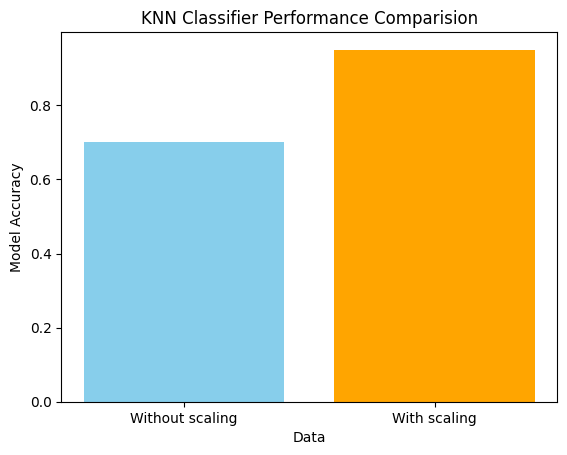

In [157]:
labels = list(knn_dict.keys())
acc = list(knn_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('KNN Classifier Performance Comparision')

Text(0.5, 1.0, 'Decision Tree Classifier Performance Comparision')

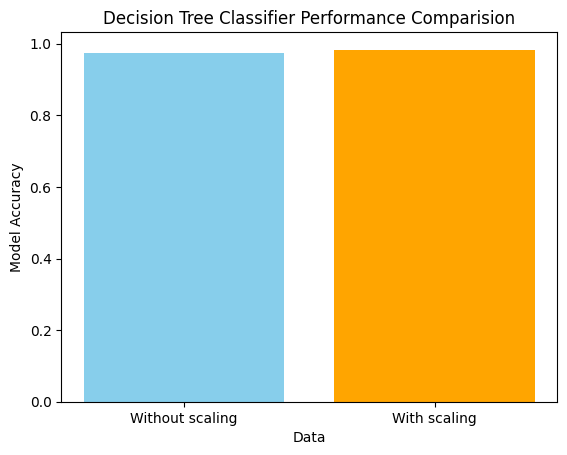

In [158]:
labels = list(dtc_dict.keys())
acc = list(dtc_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('Decision Tree Classifier Performance Comparision')

Text(0.5, 1.0, 'Random Forest Classifier Performance Comparision')

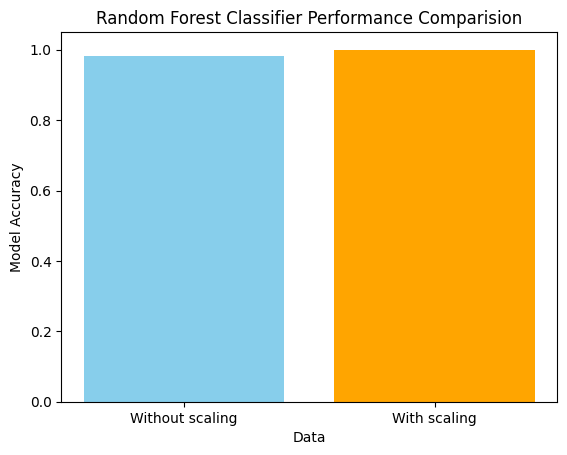

In [159]:
labels = list(rfc_dict.keys())
acc = list(rfc_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('Random Forest Classifier Performance Comparision')

Text(0.5, 1.0, 'AdaBoost Classifier Performance Comparision')

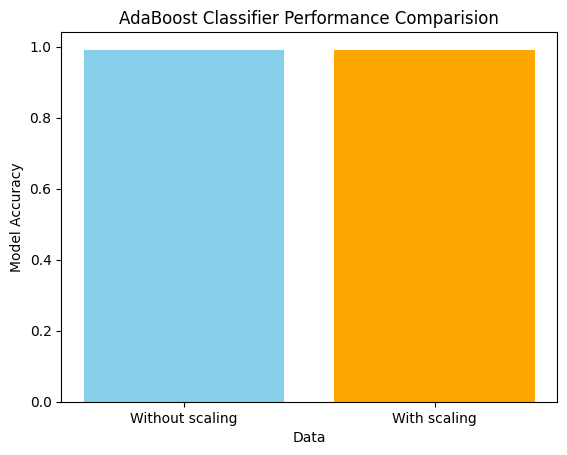

In [160]:
labels = list(ada_dict.keys())
acc = list(ada_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('AdaBoost Classifier Performance Comparision')

Text(0.5, 1.0, 'GradientBoost Classifier Performance Comparision')

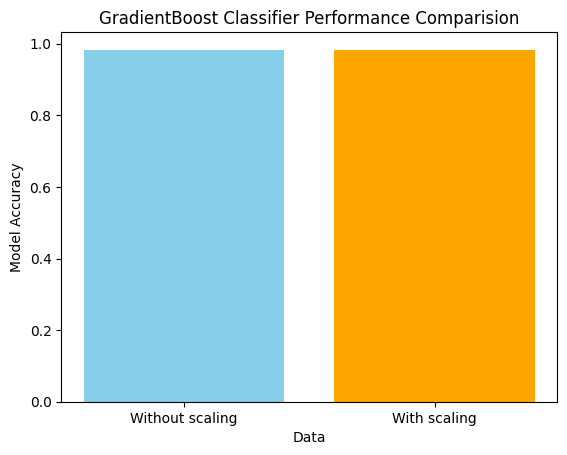

In [161]:
labels = list(gbc_dict.keys())
acc = list(gbc_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('GradientBoost Classifier Performance Comparision')

Text(0.5, 1.0, 'XGB Classifier Performance Comparision')

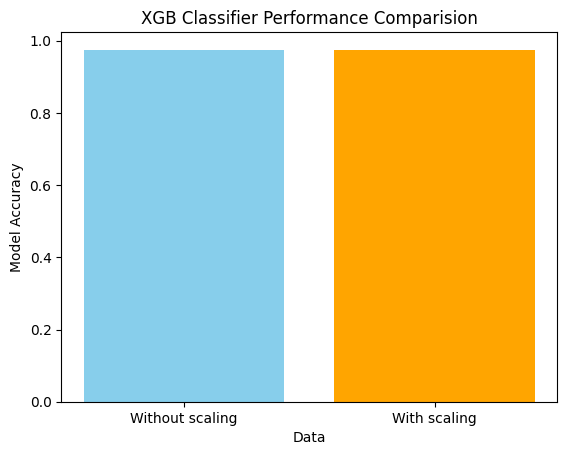

In [162]:
labels = list(xgb_dict.keys())
acc = list(xgb_dict.values())

plt.bar(labels, acc, color = ['skyblue', 'orange'])
plt.xlabel('Data')
plt.ylabel('Model Accuracy')
plt.title('XGB Classifier Performance Comparision')

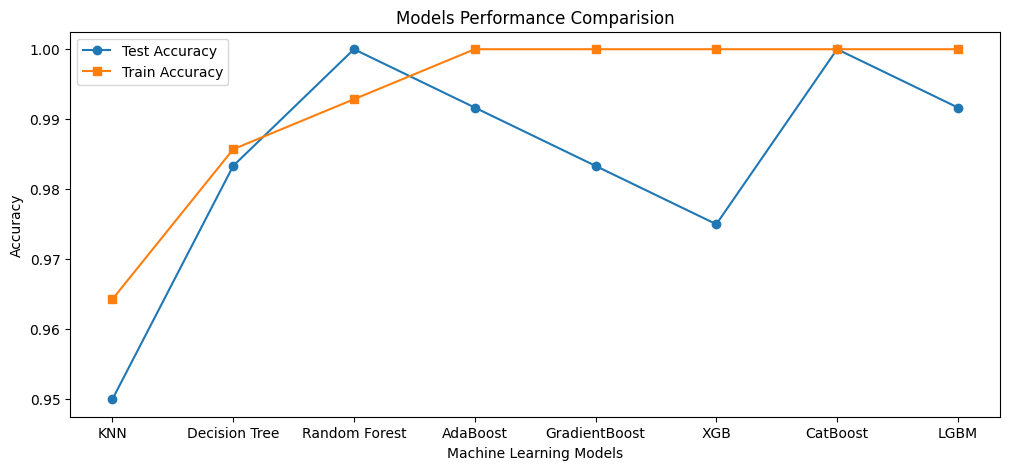

In [167]:
Models = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'XGB', 'CatBoost', 'LGBM']
Test_Accuracy = [scale_knn_test_acc, scale_dtc_test_acc, scale_rfc_test_acc, scale_ada_test_acc, scale_gbc_test_acc, scale_xgb_test_acc,
            cat_test_acc, lgbm_test_acc]
Train_Accracy = [scale_knn_train_acc, scale_dtc_train_acc, scale_rfc_train_acc, scale_ada_train_acc, scale_gbc_train_acc, scale_xgb_train_acc,
            cat_train_acc, lgbm_train_acc]

plt.figure(figsize = (12, 5))

plt.plot(Models, Test_Accuracy, marker='o', label='Test Accuracy')
plt.plot(Models, Train_Accracy, marker='s', label='Train Accuracy')

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Models Performance Comparision')
plt.legend()
plt.show()

In [175]:
output = rfc.predict(x_test)

d = {'Actual' : y_test, 'Predicted' : output}
d = pd.DataFrame(d)
d

Actual  Predicted
132       0          0
309       1          1
341       1          1
196       0          0
246       0          0
..      ...        ...
216       0          0
259       1          1
49        0          0
238       0          0
343       1          1

[120 rows x 2 columns]

In [178]:
import pickle

pickle.dump(rfc, open('model.pkl', 'wb'))

In [191]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(x_test[2].reshape(1,-1)))

[1]
